In [10]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./telecom_churn_clean.csv")
df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
X = df[["account_length", "customer_service_calls"]].values
y = df["churn"].values

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))


Accuracy:  0.86
Classification report:                precision    recall  f1-score   support

           0       0.86      1.00      0.92       855
           1       0.78      0.05      0.09       145

    accuracy                           0.86      1000
   macro avg       0.82      0.52      0.51      1000
weighted avg       0.85      0.86      0.80      1000

Confusion matrix:  [[853   2]
 [138   7]]


In [24]:
y_pred = np.array([
    [30.0, 17.5],
    [107.0, 24.0],
    [213.0, 10.9],
    ])

print(knn.predict(y_pred))

[0 1 0]


Model Complexity Curve


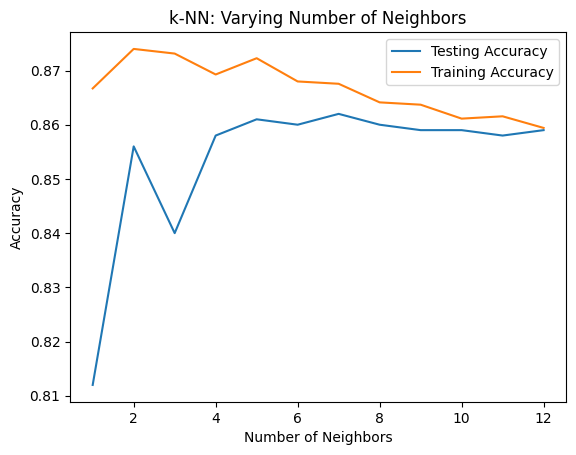

In [25]:
# choose the besk k, print the name of this method
print("Model Complexity Curve")
import matplotlib.pyplot as plt

neighbors = np.arange(1, 13)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title("k-NN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))

Accuracy:  0.862
Classification report:                precision    recall  f1-score   support

           0       0.86      1.00      0.93       855
           1       0.77      0.07      0.13       145

    accuracy                           0.86      1000
   macro avg       0.82      0.53      0.53      1000
weighted avg       0.85      0.86      0.81      1000

Confusion matrix:  [[852   3]
 [135  10]]
